In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))


/var/folders/t_/zg07cvps22539wsx9x9l8nhr0000gn/T/ipykernel_14550/2984378462.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Portrait of a New Zealand population at risk for COVID-19

#### BY : Kai Jin  

#### Student ID : 22011493

## Table of Contents
1. **Introduction**
   - Datasets used
   - Dataset sources
   - Key research questions
3. **Executive Summary**
   - The relationship between people's attention to COVID-19 and the government(COVID-19 test)
   - Based on gender analysis
   - Based on ethnicity analysis
   - Based on geographical analysis
   - Based on age analysis
   - Linear regression analysis based on number of deaths (during COVID-19)
4. **Conclusion**
   - Key findings
5. **Bibliography**

# Introduction
    The epidemic of COVID-19 has brought serious harm to the world. It has caused a substantial impact on New Zealand, seriously endangering the social order and public health safety of New Zealand residents. Based on the statistical data of COVID-19-related information in previous years and the policies promulgated by the government, the relationship between residents 'attitudes towards COVID-19 and the policies promulgated by the government can be studied. Through data analysis, the population portrait of the susceptible population in COVID-19 is carried out to focus on such people, reduce the harm of COVID-19 to such people, and analyze and predict the death cases of such people in the future to adjust the attention of social, medical care to such people, and make appropriate adjustments to the analysis.

#### Datasets used
    1.Testing period(COVID-19 test results delivered in past 24 hours and cumulative total)
    2.Case demographics(By gender)
    3.Case demographics(By ethnicity)
    4.Status of cases
    5.Case demographics(By age)
    6.Weekly deaths(Deaths by age (week ended))
    7.Event

#### Dataset sources
    1.https://www.stats.govt.nz/experimental/covid-19-data-portal/
    2.https://covid19.govt.nz/about-our-covid-19-response/history-of-the-covid-19-alert-system/
    3.https://covid19.govt.nz/about-our-covid-19-response/history-of-the-covid-19-protection-framework-traffic-lights/

### Key research questions
    1.Whether there is a correlation between the importance people attach to COVID-19 and the policies promulgated by the government
    2.A portrait of a population susceptible to COVID-19
    3.During the period of COVID-19, the mortality of COVID-19 susceptible people in New Zealand was analyzed

### Executive Summary
      Import the required extension libraries, plotting tools, and datasets into the jupyter notebook, and perform exploratory data analysis (EDA) on the key questions raised by going through data cleaning, filtering, and plotting the data in the dataset.
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import patsy
import plotly
import sys
import plotly.graph_objects as go
import plotly_express as px
import statsmodels.formula.api as smf
import os

from datetime import datetime
from matplotlib.pyplot import MultipleLocator


%matplotlib inline


Set and limit the output data to prevent too much output data.

In [3]:
pd.set_option('display.max_columns',5)
pd.set_option('display.max_rows',5)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth',10000)


Import the required data set, where the data set "metadata" is the directory of data set data, which is only used when consulting the required data in the data set "data", and the data set "Event" is the policy promulgated and implemented by the New Zealand government on COVID-19 prevention since the epidemic of COVID-19 in New Zealand.

In [4]:
excel1 = pd.read_excel('../covid_19_data_portal.xlsx', sheet_name='metadata',na_values='#N', header=0)
excel2 = pd.read_excel('../covid_19_data_portal.xlsx', sheet_name='data',na_values='#N', header=0)
excel3 = pd.read_excel('../covid_19_data_portal.xlsx', sheet_name='Event',na_values='#N', header=0)
data2 = pd.DataFrame(excel2)
data3 = pd.DataFrame(excel3)

#### The relationship between people's attention to COVID-19 and the government(COVID-19 test)

Filter the desired column from the data set "data", index the row with "CPCOV1" in the list, and process the missing data to generate the desired data" Test_data".

In [5]:
data_Testing = data2[['ResourceID','Period','Value']]

data_Testing_re = data_Testing[data_Testing.notnull()]

Test_data = data_Testing_re.loc[(data_Testing_re['ResourceID'] == 'CPCOV1')]

Process the data set "Event", add a new column name that is the same as the "Value" column name in "Test_data", and perform an inner join on the two lists based on the time data in the table to obtain the required new table "data_event".

In [6]:
data3.Period.astype('datetime64[ns]')
Test_data.Period.astype('datetime64[ns]')
data_event = pd.merge(data3, Test_data, how='inner', on='Period')

The data format in the data table "data_event" and "Test_data" are converted and plotted through the imported drawing tool, so that the relationship between the two can be clearly seen.

In [7]:
date = np.array(Test_data['Period'].astype(str))
Value = np.array(Test_data['Value'].astype(float).astype(int))
date1 =np.array(data_event['Period'].astype(str))
Value1 = np.array(data_event['Value'].astype(float).astype(int))

xs = [datetime.strptime(d, '%Y-%m-%d').date() for d in date]
xs1 = [datetime.strptime(d, '%Y-%m-%d').date() for d in date1]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=xs,
    y=Value,
    name='Testing people'
) )
fig.add_trace(go.Scatter(
    mode="markers", hovertemplate="<b>x:</b> %{x}<br><b>y:</b> %{y}<extra></extra>",
    x=xs1,
    y=Value1,
    name="COVID-19 Event",
  
) )

fig.update_layout(
    title="People tested for COVID-19",
    title_x=0.5,
    xaxis=dict(title="Date"),
    yaxis=dict(title="Number"),
)
fig.show()


plt.gcf().autofmt_xdate()  
plt.show()


<Figure size 640x480 with 0 Axes>

In [8]:

data_event = data_event[data_event.notnull()]

dic1 = data_event.loc[data_event['Period'] == '2020-08-12']
dic2 = data_event.loc[data_event['Period'] == '2021-08-17']
dic3 = data_event.loc[data_event['Period'] == '2022-03-11']
event = pd.merge(dic1,dic2, how ='outer')
event = pd.merge(dic3,event, how ='outer')
event

,Period,Event,ResourceID,Value
0,2022-03-11,Isolation period drops from 10 to 7 days at 11:59pm.,CPCOV1,4614.00
1,2020-08-12,"At 12 noon, Auckland region moves to Alert Level 3. The rest of New Zealand moves to Alert Level 2.",CPCOV1,5978.00
2,2021-08-17,All of New Zealand moves to Alert Level 4 at 11:59pm.,CPCOV1,2587.00


It can be clearly seen from the above chart that the enthusiasm of the public to test for COVID-19 is strongly correlated with the policies promulgated by the government. There are two obvious months (" 2020-03 "and" 2021-08 ") in which the number of people increases and decreases. Before and after the fluctuation of the number of people, the government has issued corresponding epidemic prevention policies and adjusted the COVID-19 The alert level, where a rise in the number of people is clearly a sign that the government is stepping up efforts to prevent the disease, and a fall is vice versa. So this chart shows that there is a correlation between how seriously people take COVID-19 and how seriously governments take the disease.

The "Test_data" is processed to establish a daily growth rate plot of people's testing for COVID-19. By observing the fluctuation size and density between the lines, it can be seen how the people are reacting to the COVID-19 epidemic.

In [9]:
Test_GR = Test_data['Value'].pct_change(1).fillna(0).apply(lambda x: format(x, '.2%'))
Test_GR = pd.DataFrame(Test_GR)
Test_GR.loc[:, 'Period'] = 0
Test_GR["Period"] = Test_data["Period"].tolist()


In [10]:
date = np.array(Test_GR['Period'].astype(str))
Value = np.array(Test_GR['Value'].str.rstrip('%').astype('float') / 100.0)

xs = [datetime.strptime(d, '%Y-%m-%d').date() for d in date]
 

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=xs,
    y=Value
))
fig.update_layout(
    title="People tested for COVID-19(Daily sequential growth rate)",
    title_x=0.5,
    xaxis=dict(title="Date"),
    yaxis=dict(title="Growth rate"),
)
fig.show()
 

plt.gcf().autofmt_xdate()  
plt.show()


<Figure size 640x480 with 0 Axes>

#### Based on gender analysis
     The data" Test_Gender" is generated by filtering the desired column from the data set "data" and indexing the row in the list where "'CPCOV5" is present and processing the name of the list. And by building a bar chart, it is clear that the number of women infected with COVID-19 is as high as 1.220169(M), which is the largest number of people in gender, so women are more likely to get COVID-19 than men and unknow gender.

In [11]:
data_Testing1 = data2[['ResourceID','Value','Label1','Label2']]
Test_Gender1 = data_Testing1.loc[(data_Testing1['ResourceID'] == 'CPCOV5')]
Test_Gender1
Test_Gender = Test_Gender1.rename(
    columns={'Label1': 'Status',
             'Label2': 'Gender',})



In [12]:
fig = px.bar(Test_Gender,
            x="Gender",
            y="Value",
            color="Status")
fig.show()

The number of different genders in the data set "Test_Gender" is processed and the sum of the number of people affected by COVID-19 of different genders is calculated. Finally, a pie chart is drawn through mathematical formula processing. It is more intuitive to see that the possibility of female disease is much higher than that of male and unknown gender.In the pie chart, the prevalence of women accounts for 54.6%, more than half of the total population, so more attention should be paid to whether women will be infected with COVID-19.

In [13]:
dic1 = Test_Gender.loc[Test_Gender['Gender'] == 'Male']
dic1['Sum'] = dic1['Value'].sum()
dic2 = Test_Gender.loc[Test_Gender['Gender'] == 'Female']
dic2['Sum'] = dic2['Value'].sum()
dic3 = Test_Gender.loc[Test_Gender['Gender'] == 'Unknown']
dic3['Sum'] = dic3['Value'].sum()
dic4 = pd.concat([dic1,dic2,dic3],axis=0,join='inner')
dic4.drop_duplicates('Sum',inplace = True)
fig = px.pie(dic4,
             names="Gender",
             values="Sum", 
            )
fig.update_layout(
    title={   
        "text":"Proportion of COVID-19 cases (Gender)",
        "y":0.96,  
        "x":0.5, 
        "xanchor":"center", 
        "yanchor":"top"  
    })
fig.show()

/var/folders/t_/zg07cvps22539wsx9x9l8nhr0000gn/T/ipykernel_14550/1173186560.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t_/zg07cvps22539wsx9x9l8nhr0000gn/T/ipykernel_14550/1173186560.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t_/zg07cvps22539wsx9x9l8nhr0000gn/T/ipykernel_14550/1173186560.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

####  Based on ethnicity analysis
      Filter the desired column from the dataset "data" and index the row with "'CPCOV5.2" in the list, processing the list names to produce the desired data" Test_Ethnicity". And through the establishment of horizontal bar statistics, It can be clearly seen that the number of patients from European or other ethnic groups is far more than that of other ethnic groups, with the number of patients as high as 1.34426(M). Among known races, the lowest affected race is MELAA, with only 39.524(K). Therefore, more attention should be paid to whether European or other ethnic groups will be infected with COVID-19.

In [14]:
data_Testing2 = data2[['ResourceID','Value','Label1','Label2']]

Test_Ethnicity1 = data_Testing2.loc[(data_Testing2 ['ResourceID'] == 'CPCOV5.2')]
Test_Ethnicity = Test_Ethnicity1.rename(
    columns={
        'Label1': 'Status',
        'Label2': 'Ethnicity',})


In [15]:
fig = px.bar(Test_Ethnicity,
             x="Value",
             y="Ethnicity",
             orientation='h',  
             color="Status",
             barmode="group",
            )

fig.show()



####  Based on geographical analysis
       Filter the desired column from the data set "data", index the row with "CPCOV4" in the list, and process the name of the list to produce the desired data" Test_Status". And through the establishment of horizontal bar statistics, it is obvious that the number of patients in Canterbury is much larger than that in other areas.The highest number of patients in this region was 290.609 (K), which should be paid more attention to.

In [16]:
data_Geographical2 = data2[['ResourceID','Value','Label1','Geo']]

Test_Geographical1 = data_Geographical2.loc[(data_Geographical2['ResourceID'] == 'CPCOV4')]
Test_Status = Test_Geographical1.rename(
    columns={
        'Geo': 'geographical',
        'Label1': 'Status',})

fig = px.bar(Test_Status,
             x="Value",
             y="geographical",
             orientation='h',  
             color="Status",
             barmode="group",
            )

fig.show()

####  Based on age analysis
        Filter the desired column from the data set "data", index the row in the list where "CPCOV5.1" is present, and process the name of the list to produce the desired data" Test_Age". And by creating a horizontal bar chart, it is clear that the number of people with the disease between 30 and 39 years old is  larger than the number of people in other age groups.The highest number of patients aged 30 to 39 years was 384.167 (K), which should be paid more attention by the government.

In [17]:
data_Age2 = data2[['ResourceID','Value','Label1','Label2']]

Test_Age1 = data_Age2.loc[(data_Age2['ResourceID'] == 'CPCOV5.1')]
Test_Age = Test_Age1.rename(
    columns={
        'Label2': 'Age',
        'Label1': 'Status',})


In [18]:
fig = px.bar(Test_Age,
            x="Age",
            y="Value",
            color="Status")
fig.show()

#### Linear regression analysis based on number of deaths (during COVID-19)
      Filter the desired column from the data set "data", index the row with "CPCOV5.1" in the list, and process the name of the list to generate the desired data" Test_deaths". According to the conclusions of the "Based on ethnicity analysis" section earlier. Index the data for the age range 30 to 59 years old, and intercept the change in deaths in this group since the COVID-19 epidemic in New Zealand to produce the data "data_1" and plot it as a line chart.

In [19]:
Test_deaths2 = data2[['ResourceID','Value','Label1','Period']]
Test_deaths1 = Test_deaths2.loc[(Test_deaths2['ResourceID'] == 'CPWEE1')]
Test_deaths1
Test_deaths = Test_deaths1.rename(
    columns={
       'Label1': 'Age',})
Test_deaths = Test_deaths.loc[(Test_deaths['Age'] == '30 to 59')]
Test_deaths = Test_deaths.loc[(Test_deaths['Period'] >= '2020-01-05')]
data_1 = Test_deaths

In [20]:
date = np.array(data_1['Period'].astype(str))
Value = np.array(data_1['Value'].astype(float).astype(int))

xs = [datetime.strptime(d, '%Y-%m-%d').date() for d in date]
 

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=xs,
    y=Value
))
fig.update_layout(
    title="The number of people who have died during COVID-19(30 to 59)",
    title_x=0.5,
    xaxis=dict(title="Date"),
    yaxis=dict(title="Number"),
)



plt.gcf().autofmt_xdate()  

fig.show()

<Figure size 640x480 with 0 Axes>

Prepare for a linear regression by plotting a scatter plot against data_1.

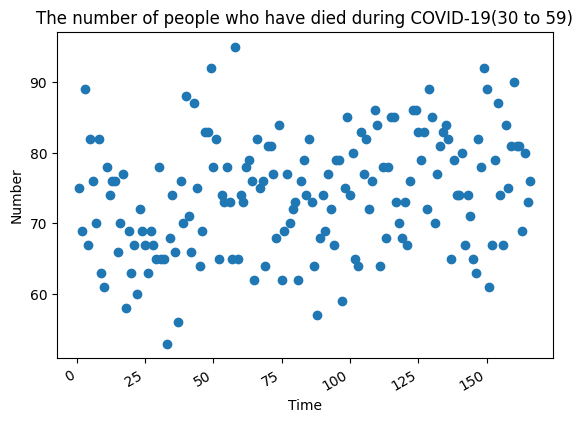

In [21]:
data_1['Time']= np.linspace(1,166,166)
data_1 = data_1[['Value','Time']]
data_1
Value = np.array(data_1['Value'].astype(float).astype(int))
Time = np.array(data_1['Time'].astype(float).astype(int))

plt.scatter(Time, Value)
plt.title('The number of people who have died during COVID-19(30 to 59)')
plt.xlabel('Time')
plt.ylabel('Number')

plt.show

plt.gcf().autofmt_xdate()  


The following values = 0.27 show that the relationship between "Time" and "Value" is not strong, showing a weak correlation, which only provides reference value for the prediction results of regression.

In [22]:
data_1.corr()


,Value,Time
Value,1.00,0.27
Time,0.27,1.00


Calculate the intercept and slope for both "Time" and "Value".

In [23]:
slope, intercept = np.polyfit(Time, Value, 1)
print('Slope:', slope)
print('Intercept:', intercept)

Slope: 0.04651769844757334
Intercept: 70.2543263964951


The use of OLS is used to analyze the linear regression, compare the difference between the various points in "Time" and "Value" and the predicted best fit line to measure the amount of error generated, thus summarizing the linear regression.

In [24]:
mod = smf.ols("Value ~ Time", data_1).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     13.25
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           0.000366
Time:                        16:53:53   Log-Likelihood:                -577.46
No. Observations:                 166   AIC:                             1159.
Df Residuals:                     164   BIC:                             1165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.2543      1.231     57.092      0.000      67.825      72.684
Time           0.0465      0.013      3.639      0.000       0.021       0.072
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.688
Skew:                           0.060   Prob(JB):                        0.709
Kurtosis:                       2.708   Cond. No.                         193.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In a scatter plot, draw the regression line.

Text(0, 74, 'y=0.0465 * x + 70.2543')

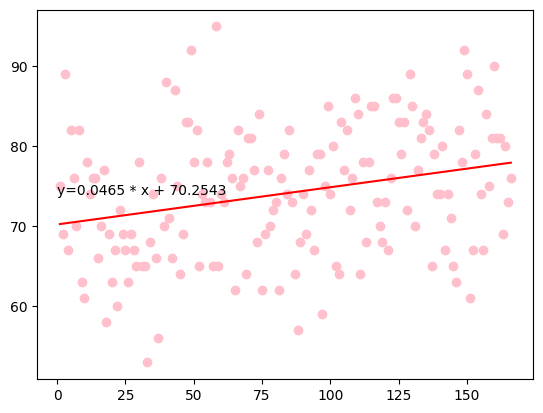

In [25]:
x=Time
y=Value
plt.scatter(x, y,color='pink')
plt.plot(x , mod.params[0]+mod.params[1]*x, 'r')
plt.text(0,74,'y='+str(round(mod.params[1],4))+' * x + ' + str(round(mod.params[0], 4)),color='black')

From the above chart, it can be concluded that "Time" and "Value" are positively and weakly correlated, although the correlation is weak, but still has some reference value, "Value" will increase with the growth of "Time" and a small increase.

# Conclusion
     To sum up, based on the joint research and analysis of multiple sets of data and the analysis of the future data changes by linear regression, the New Zealand government can realize that the impact of the policy on the people is enormous. The people actively cooperate with the government's policies, so they should be more cautious about promoting the policy. The population portrait analysis of the susceptible population of COVID-19 is also carried out so that the government can increase more attention to the exposed people based on preventing discrimination, and on the basis of linear regression analysis, early preparation for the possible future situation of the susceptible population is carried out to reduce future medical pressure.

### Key findings
1.  There is an obvious and strong connection between the people's attention to the COVID-19 epidemic and the decrees issued by the government, and the people are very active in obeying the government's policies. When the government promulgates the more urgent situation, the people pay more attention to the COVID-19, and when the promulgations are more relaxed, the opposite is true.   
2. The population profile of the COVID-19 population is summarized as follows: female, race is European or other, living in Canterbury, aged between 30 and 39 years old. The more such labels there are in the population, the more attention should be paid by the government, and at the same time, discrimination should be prevented.
3. Among people aged 30 to 59, the number of deaths during the COVID-19 epidemic in New Zealand is the largest. According to the linear regression model (least square method), the number of deaths is weakly positively correlated with the date, which has certain reference value. According to the diagram of the regression line, it can be predicted that the number of deaths in this age range will increase slightly in the future, and social medical institutions need to be prepared for this event.


# Bibliograph
1. McKinney, W. (2022). Python for data analysis : data wrangling with pandas, numPy, and Jupyter (Third edition). O’Reilly Media, Inc.
2. Gupta, D (2020). Intelligent data analysis : from data gathering to data comprehension. Wiley. 
3. Gujarati, D. N. (2019). Linear regression : a mathematical introduction. SAGE Publications, Inc.
4. Lučanin, D. (2018). Jupyter Notebook for data science. PACKT Publishing.



In [15]:
data = pd.read_excel('../1.xlsx', sheet_name='Sheet1',na_values='#N', header=0)

In [7]:
x = [d['T'] for d in data]
y = [d['data'] for d in data]
kinds = [d['kind'] for d in data]

# 创建颜色映射
color_mapping = {
    'nb': 'red',
    'knn': 'blue',
    'rf': 'green',
    'km': 'orange',
}

# 绘制散点图
for i in range(len(data)):
    plt.scatter(x[i], y[i], color=color_mapping[kinds[i]])

# 显示图形
plt.show()
# 

TypeError: string indices must be integers, not 'str'

In [16]:
data['kind']

0     knn
1     knn
2     knn
3      rf
4     knn
5     knn
6     knn
7     knn
8     knn
9      nb
10     nb
11     nb
12     nb
13     rf
14    knn
15    knn
16     nb
17     nb
18     nb
19     nb
20     nb
21     nb
22     nb
23     km
24     km
25     km
26     km
27     rf
28     km
29     km
30     km
31     km
32     rf
33    knn
34     rf
35     nb
36     nb
37     nb
38     nb
39     km
40     km
41     km
42     km
43     km
44     km
Name: kind, dtype: object

In [17]:
time = data['time']
data = data['data']
kind = data['kind']

color_map = {'knn': 'red', 'rf': 'blue', 'nb': 'green', 'km': 'yellow'}

# Initialize lists to store data points for each kind
knn_data = []
rf_data = []
nb_data = []
km_data = []

# Iterate over the data and separate them based on the kind value
for t, d, k in zip(time, data, kind):
    if k == 'knn':
        knn_data.append((t, d))
    elif k == 'rf':
        rf_data.append((t, d))
    elif k == 'nb':
        nb_data.append((t, d))
    elif k == 'km':
        km_data.append((t, d))

# Plot the scatter points with different colors
plt.scatter(*zip(*knn_data), color=color_map['knn'], label='knn')
plt.scatter(*zip(*rf_data), color=color_map['rf'], label='rf')
plt.scatter(*zip(*nb_data), color=color_map['nb'], label='nb')
plt.scatter(*zip(*km_data), color=color_map['km'], label='km')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Scatter Plot with Different Colors')

# Add a legend
plt.legend()

# Show the plot
plt.show()

KeyError: 'kind'

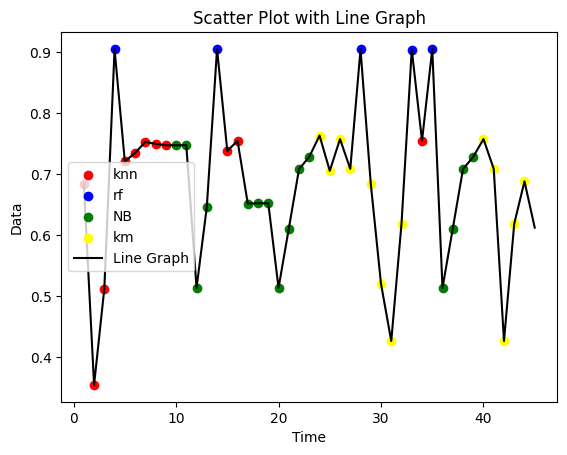

In [24]:
# Define the data
time = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
data = [0.684092, 0.353858, 0.511969, 0.904909, 0.720716, 0.734627, 0.752703, 0.749442, 0.747225, 0.747225, 0.747225, 0.513127, 0.645726, 0.905343, 0.737922, 0.754563, 0.651398, 0.652010, 0.652010, 0.513113, 0.610187, 0.708019, 0.728277, 0.763191, 0.705283, 0.757400, 0.708423, 0.904576, 0.684241, 0.519686, 0.425858, 0.618445, 0.904382, 0.754563, 0.904769, 0.513113, 0.610187, 0.708019, 0.728277, 0.757400, 0.708423, 0.425858, 0.618445, 0.687996, 0.611974]
kind = ['knn', 'knn', 'knn', 'rf', 'knn', 'knn', 'knn', 'knn', 'knn', 'nb', 'nb', 'nb', 'nb', 'rf', 'knn', 'knn', 'nb', 'nb', 'nb', 'nb', 'nb', 'nb', 'nb', 'km', 'km', 'km', 'km', 'rf', 'km', 'km', 'km', 'km', 'rf', 'knn', 'rf', 'nb', 'nb', 'nb', 'nb', 'km', 'km', 'km', 'km', 'km']

# Create a dictionary to map colors to the kind values
color_map = {'knn': 'red', 'rf': 'blue', 'nb': 'green', 'km': 'yellow'}

# Initialize lists to store data points for each kind
knn_data = []
rf_data = []
nb_data = []
km_data = []

# Iterate over the data and separate them based on the kind value
for t, d, k in zip(time, data, kind):
    if k == 'knn':
        knn_data.append((t, d))
    elif k == 'rf':
        rf_data.append((t, d))
    elif k == 'nb':
        nb_data.append((t, d))
    elif k == 'km':
        km_data.append((t, d))

# Plot the scatter points with different colors
plt.scatter(*zip(*knn_data), color=color_map['knn'], label='knn')
plt.scatter(*zip(*rf_data), color=color_map['rf'], label='rf')
plt.scatter(*zip(*nb_data), color=color_map['nb'], label='NB')
plt.scatter(*zip(*km_data), color=color_map['km'], label='km')

# Plot lines for time and data
plt.plot(time, data, color='black', linestyle='-', label='Line Graph')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Scatter Plot with Line Graph')

# Add a legend
plt.legend()

# Show the plot
plt.show()